In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


#### Acessar os dados

In [4]:
# fetch dataset 
df = pd.read_csv("Heart_disease_cleveland_new.csv")
# data 
X = df.drop("target", axis=1)
y = df["target"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.70, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

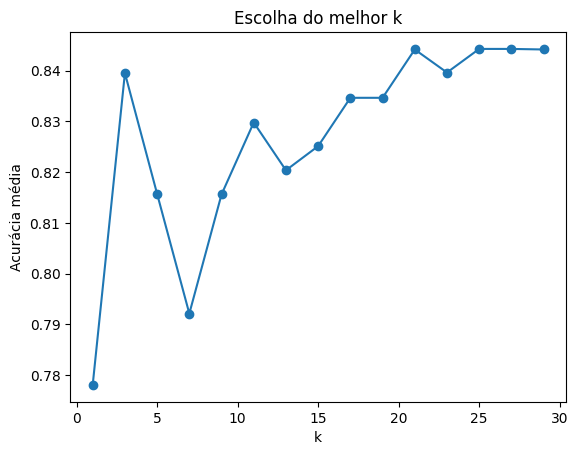

In [18]:
ks = list(range(1, 30, 2))
cv_scores = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# 5. Plotar k vs. acurácia
plt.plot(ks, cv_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Acurácia média")
plt.title("Escolha do melhor k")
plt.show()

In [13]:
best_k = ks[np.argmax(cv_scores)]
print(f"Melhor k: {best_k}")

Melhor k: 25


In [14]:
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=25)

In [16]:
y_pred = final_model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia final no teste: {acc:.4f}")

Acurácia final no teste: 0.8571


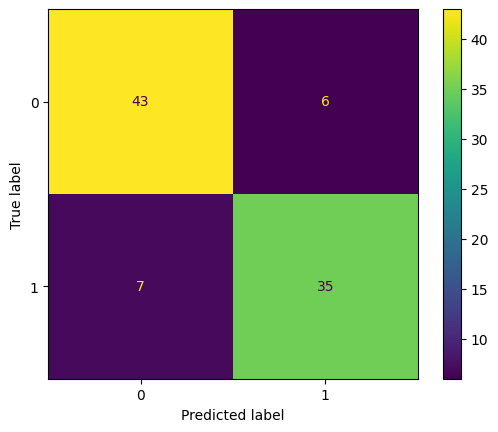

In [17]:
mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=mat, display_labels=final_model.classes_)
disp.plot()